In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [199]:
data = pd.read_csv("cw1a.csv", comment="#")
base_current = data['Ib (A)']
base_emiter_voltage = data['Vbe (V)']

thermal_voltage = 0.026


In [200]:
def Ib(ube, i_s, eta):
    return i_s*(np.exp(ube/(eta*thermal_voltage)) - 1)

In [201]:
popt, pcov = curve_fit(Ib, xdata = base_emiter_voltage, ydata = base_current, p0=[1, 1.5])
i_s, eta = popt
i_s, eta

(2.4364332058948277e-15, 1.1794564652481272)

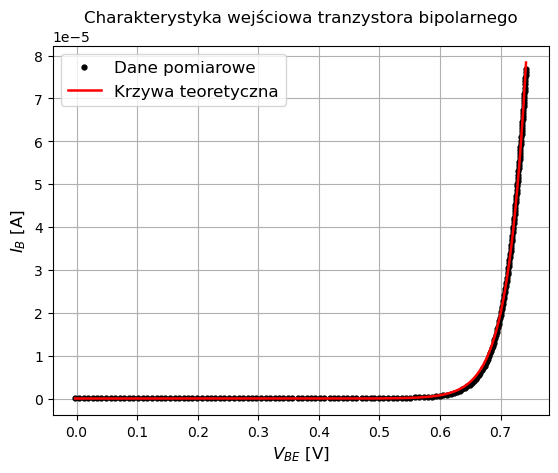

In [202]:
plt.plot(base_emiter_voltage, base_current, marker = 'o', color = 'black', markersize = 3.5, label = 'Dane pomiarowe', linestyle = ' ')
plt.plot(base_emiter_voltage, Ib(base_emiter_voltage, popt[0], popt[1]), color = 'red', linewidth = 1.8, label = 'Krzywa teoretyczna')
plt.ylabel(r"$I_{B}$ [A]", fontsize = 12)
plt.xlabel(r"$V_{BE}$ [V]", fontsize = 12)
plt.title("Charakterystyka wejściowa tranzystora bipolarnego")
plt.legend(fontsize = 12)
plt.grid()

In [203]:
data = pd.read_csv("cw1b.csv", comment="#")
collector_current = data['Ic (A)']
beta = (collector_current[len(collector_current) - 1] - collector_current[0])/((base_current[len(base_current) - 1] - base_current[0]))
gm = abs(collector_current/thermal_voltage)

In [204]:
import matplotlib.ticker as ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Ustawienia dla notacji naukowej

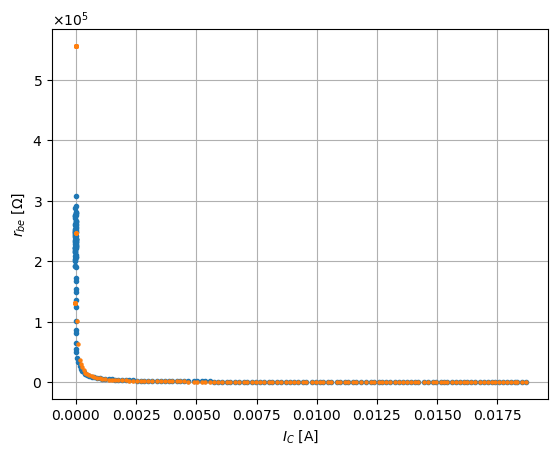

In [205]:
plt.plot(collector_current, (eta*thermal_voltage)/base_current, marker = 'o', linestyle = '', markersize = 3)
plt.plot(collector_current, beta/gm, marker = 'o', linestyle = '', markersize = 2.2)
plt.grid()
plt.xlabel(r"$I_{C}$ [A]")
plt.ylabel(r"$r_{be}$ [$\Omega$]")
plt.gca().yaxis.set_major_formatter(formatter)  

In [206]:
data = pd.read_csv("cw1b.csv", comment="#")
collector_current = data['Ic (A)']
base_emiter_voltage = data['Vbe (V)']

In [207]:
def Ic(Ube, beta, Is, eta):
    return beta*Is*(np.exp(Ube/(eta*0.026)) - 1)

In [208]:
popt, _ = curve_fit(Ic, xdata = base_emiter_voltage, ydata = collector_current, p0=[120, 2e-15, 1.15])
beta, saturation_current, ideality_factor = popt
popt, pcov

(array([2.63113746e+02, 4.37657635e-15, 1.20758981e+00]),
 array([[2.82040333e-32, 5.72612486e-19],
        [5.72612486e-19, 1.16280411e-05]]))

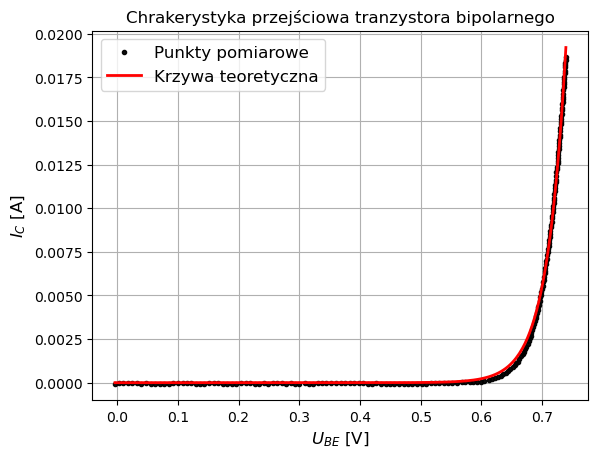

In [209]:
plt.plot(base_emiter_voltage, collector_current, color = 'black', linestyle = '', marker = 'o', markersize = 3, label = 'Punkty pomiarowe', alpha = 0.95)
plt.plot(base_emiter_voltage, Ic(base_emiter_voltage, beta, saturation_current, ideality_factor), color = 'red', linewidth = 2, label = 'Krzywa teoretyczna')
plt.xlabel(r"$U_{BE}$ [V]", fontsize = 12)
plt.ylabel(r"$I_{C}$ [A]", fontsize = 12)
plt.title("Chrakerystyka przejściowa tranzystora bipolarnego")
plt.legend(fontsize = 12)
plt.grid()

In [210]:
def gm(Ube):
    return ((beta*saturation_current)/(eta * thermal_voltage))*np.exp(Ube/(eta*thermal_voltage))

In [211]:
beta_lowsignal = (collector_current[len(collector_current) - 1] - collector_current[0])/(base_current[len(base_current) - 1] - base_current[0])

gm_lowsignal = collector_current/thermal_voltage
beta_lowsignal

243.85962401071637

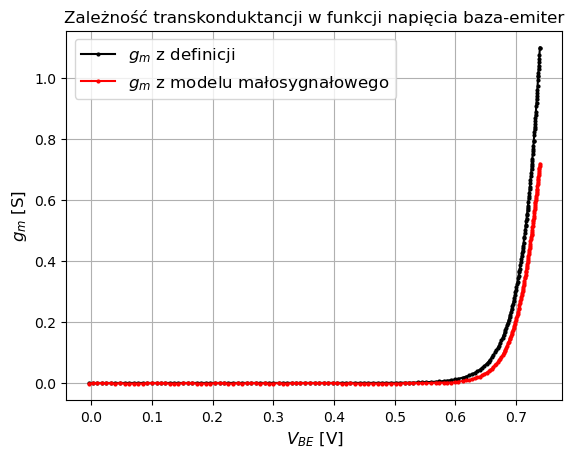

In [212]:
plt.plot(base_emiter_voltage, gm(base_emiter_voltage), color = 'black', label = r'$g_{m}$ z definicji', markersize = 2, marker = 'o')
plt.plot(base_emiter_voltage, gm_lowsignal, color = 'red', label = r'$g_{m}$ z modelu małosygnałowego', markersize = 2, marker = 'o')
plt.ylabel(r"$g_{m}$ [S]", fontsize = 12)
plt.xlabel(r"$V_{BE}$ [V]", fontsize = 12)
plt.title("Zależność transkonduktancji w funkcji napięcia baza-emiter")
plt.legend(fontsize = 12)
plt.grid()

In [213]:
data = pd.read_csv("cw1c.csv", comment="#")
collector_current = np.array_split(data['Ic (A)'], 6)
collector_emiter_base_voltage = np.array_split(data['Vce (V)'], 6)
vbe_lables = ["600 mV", "800 mV", "1000 mV", "1200 mV", "1400 mV", "1600 mV"]
collector_emiter_base_voltage = np.array(collector_emiter_base_voltage)
collector_emiter_base_voltage[1][1:201]

f:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


array([0.00796029, 0.02680768, 0.04188559, 0.05696349, 0.06827192,
       0.07581088, 0.08711931, 0.09465826, 0.10219721, 0.10973617,
       0.11727512, 0.12481408, 0.13235303, 0.14366146, 0.15120041,
       0.16250884, 0.17381727, 0.18512571, 0.20020361, 0.219051  ,
       0.24166786, 0.25674576, 0.27936263, 0.30197949, 0.32836582,
       0.35098269, 0.37359955, 0.39621641, 0.42260275, 0.45275856,
       0.47537542, 0.49799228, 0.52437862, 0.55076496, 0.57338182,
       0.59976816, 0.62615449, 0.64877135, 0.67515769, 0.69777455,
       0.72416089, 0.74677775, 0.76939461, 0.79955043, 0.82216729,
       0.84855363, 0.87117049, 0.89755683, 0.92394316, 0.94656002,
       0.97294636, 0.99556322, 1.02571904, 1.0483359 , 1.07472224,
       1.0973391 , 1.12372544, 1.1463423 , 1.17649811, 1.20288445,
       1.22550131, 1.25188765, 1.27450451, 1.29712137, 1.32350771,
       1.34612457, 1.37251091, 1.39889724, 1.42528358, 1.45166992,
       1.47428678, 1.50067312, 1.52328998, 1.54590684, 1.57229

Text(0.5, 1.0, 'Charakterystyka wyjściowa tranzystora bipolarnego')

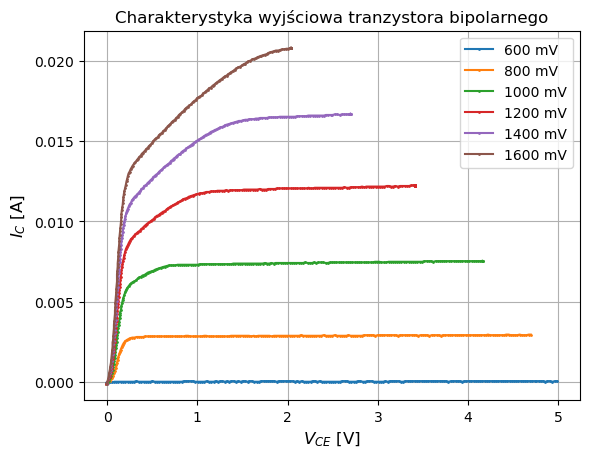

In [214]:
for i in range(0, 6):
    plt.plot(collector_emiter_base_voltage[i], collector_current[i], marker = 'o', markersize = 1, label = vbe_lables[i])
plt.grid()
plt.legend()
plt.xlabel(r"$V_{CE}$ [V]", fontsize = 12)
plt.ylabel(r"$I_{C}$ [A]", fontsize = 12)
plt.title("Charakterystyka wyjściowa tranzystora bipolarnego")

In [215]:
from scipy.stats import linregress
vrc = data['Vrc (V)']
np.where(vrc == 0.55)
early = np.empty(4)

In [216]:
fit = linregress(collector_emiter_base_voltage[1][(223-201):201], collector_current[1][(223-201):201])
print(f"Slope: {fit.slope}\nIntercept: {fit.intercept}")
early[0] = abs(-fit.intercept/fit.slope)

Slope: 2.4962963709448163e-05
Intercept: 0.0028284153298932684


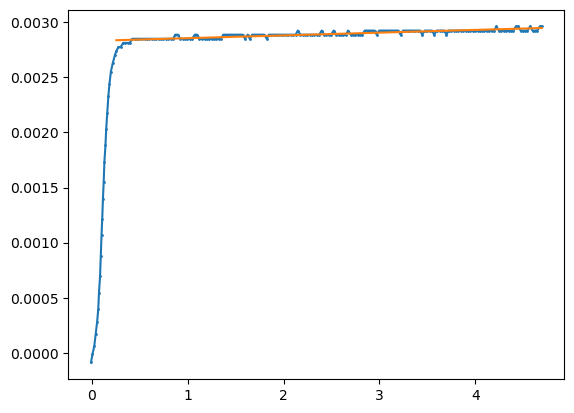

In [217]:
plt.plot(collector_emiter_base_voltage[1], collector_current[1], marker = 'o', markersize = 1, label = vbe_lables[1])
plt.plot(collector_emiter_base_voltage[1][(223-201):201], collector_emiter_base_voltage[1][(223-201):201]*fit.slope + fit.intercept)


In [218]:
index = np.where(vrc == 1.425)[0][0]
fit = linregress(collector_emiter_base_voltage[2][index:201], collector_current[2][index:201])
print(f"Slope: {fit.slope}\nIntercept: {fit.intercept}")
early[1] = abs(-fit.intercept/fit.slope)

Slope: 7.048676458337069e-05
Intercept: 0.007258412219431358


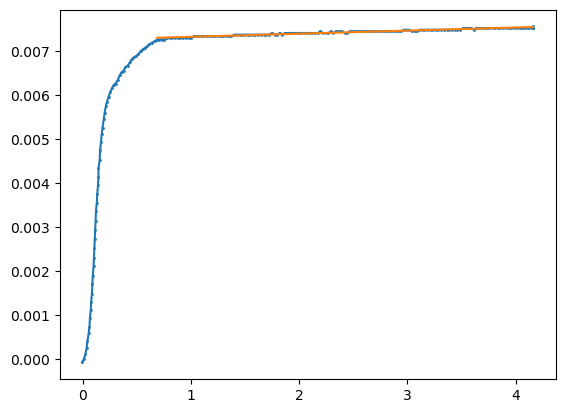

In [219]:
plt.plot(collector_emiter_base_voltage[2], collector_current[2], marker = 'o', markersize = 1, label = vbe_lables[2])
plt.plot(collector_emiter_base_voltage[2][index:201], collector_emiter_base_voltage[2][index:201]*fit.slope + fit.intercept)


In [220]:
index = np.where(vrc == 2.3)[0][0]
fit = linregress(collector_emiter_base_voltage[3][index:201], collector_current[3][index:201])
print(f"Slope: {fit.slope}\nIntercept: {fit.intercept}")
early[2] = abs(-fit.intercept/fit.slope)

Slope: 0.00014138242807985545
Intercept: 0.011745424028883499


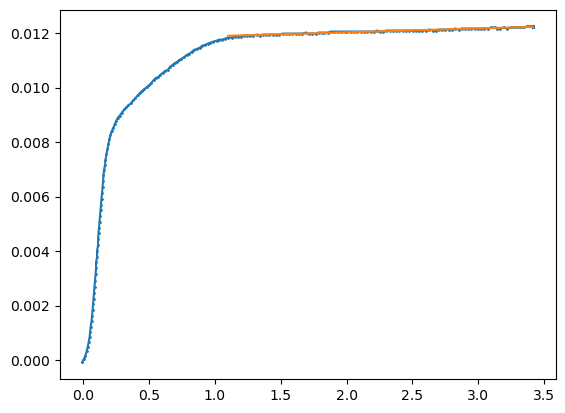

In [221]:
plt.plot(collector_emiter_base_voltage[3], collector_current[3], marker = 'o', markersize = 1, label = vbe_lables[3])
plt.plot(collector_emiter_base_voltage[3][index:201], collector_emiter_base_voltage[3][index:201]*fit.slope + fit.intercept)

In [222]:
index = np.where(vrc == 3.1)[0][0]
fit = linregress(collector_emiter_base_voltage[4][index:201], collector_current[4][index:201])
print(f"Slope: {fit.slope}\nIntercept: {fit.intercept}")
early[3] = abs(-fit.intercept/fit.slope)

Slope: 0.0002726496000966047
Intercept: 0.015945167607022116


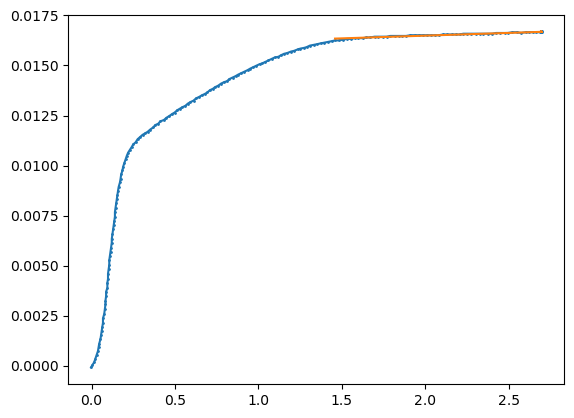

In [223]:
plt.plot(collector_emiter_base_voltage[4], collector_current[4], marker = 'o', markersize = 1, label = vbe_lables[4])
plt.plot(collector_emiter_base_voltage[4][index:201], collector_emiter_base_voltage[4][index:201]*fit.slope + fit.intercept)

In [224]:
np.mean(early)

89.45945749787789